In [1]:
import pandas as pd
import math
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.algorithms import bipartite
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import DBSCAN
from datetime import datetime

In [2]:
companies = pd.read_csv("company_directorships.csv")
directors = pd.read_csv("director-details.csv")

print(companies.head())
print(directors.head())


      company_name  cikcode              director_name software_background  \
0  1ST SOURCE CORP    34782           ALLISON N. EGIDI                   f   
1  1ST SOURCE CORP    34782            ANDREA G. SHORT                   f   
2  1ST SOURCE CORP    34782  CHRISTOPHER J. MURPHY III                   t   
3  1ST SOURCE CORP    34782   CHRISTOPHER J. MURPHY IV                   f   
4  1ST SOURCE CORP    34782            CRAIG A. KAPSON                   f   

   start_date    end_date  
0  2011-03-14  2017-03-14  
1  2023-03-10  2025-03-14  
2  2008-03-14  2025-03-14  
3  2011-03-14  2025-03-14  
4  2008-03-14  2017-03-14  
   id                                                url  \
0   2  https://www.sec.gov/Archives/edgar/data/6281/0...   
1   3  https://www.sec.gov/Archives/edgar/data/6281/0...   
2   4  https://www.sec.gov/Archives/edgar/data/6281/0...   
3   5  https://www.sec.gov/Archives/edgar/data/6281/0...   
4   6  https://www.sec.gov/Archives/edgar/data/6281/0...   

  

In [3]:
df = companies.merge(
    directors[['name', 'age', 'role', 'compensation']],
    left_on='director_name',
    right_on='name',
    how='left'
)

print("Merged DataFrame:")
print(df.head())



Merged DataFrame:
      company_name  cikcode              director_name software_background  \
0  1ST SOURCE CORP    34782           ALLISON N. EGIDI                   f   
1  1ST SOURCE CORP    34782            ANDREA G. SHORT                   f   
2  1ST SOURCE CORP    34782  CHRISTOPHER J. MURPHY III                   t   
3  1ST SOURCE CORP    34782   CHRISTOPHER J. MURPHY IV                   f   
4  1ST SOURCE CORP    34782            CRAIG A. KAPSON                   f   

   start_date    end_date name  age role  compensation  
0  2011-03-14  2017-03-14  NaN  NaN  NaN           NaN  
1  2023-03-10  2025-03-14  NaN  NaN  NaN           NaN  
2  2008-03-14  2025-03-14  NaN  NaN  NaN           NaN  
3  2011-03-14  2025-03-14  NaN  NaN  NaN           NaN  
4  2008-03-14  2017-03-14  NaN  NaN  NaN           NaN  


In [4]:

df['company_name'] = df['company_name'].str.strip().str.lower()

G = nx.Graph()
G.add_nodes_from(df['cikcode'], bipartite='company')
G.add_nodes_from(df['director_name'], bipartite='director')

edges = list(zip(df['director_name'], df['cikcode']))
G.add_edges_from(edges)

print(f"Bipartite graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print("Sample edges:", edges[:5])

director_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'director']
G_directors = bipartite.projected_graph(G, director_nodes)

print(f" Projected graph: {G_directors.number_of_nodes()} directors, {G_directors.number_of_edges()} connections")

if G_directors.number_of_nodes() > 0 and G_directors.number_of_edges() > 0:
    deg = nx.degree_centrality(G_directors)
    eig = nx.eigenvector_centrality(G_directors)
    clo = nx.closeness_centrality(G_directors)

    print("\n Top 5 - Degree Centrality:")
    for n, s in sorted(deg.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"{n}: {s:.4f}")

    print("\n Top 5 - Eigenvector Centrality:")
    for n, s in sorted(eig.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"{n}: {s:.4f}")

    print("\n Top 5 - Closeness Centrality:")
    for n, s in sorted(clo.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"{n}: {s:.4f}")
else:
    print("Centrality metrics cannot be computed — empty or invalid graph.")


Bipartite graph: 12486 nodes, 13347 edges
Sample edges: [('ALLISON N. EGIDI', 34782), ('ANDREA G. SHORT', 34782), ('CHRISTOPHER J. MURPHY III', 34782), ('CHRISTOPHER J. MURPHY IV', 34782), ('CRAIG A. KAPSON', 34782)]
 Projected graph: 11827 directors, 132861 connections

 Top 5 - Degree Centrality:
MARK A. BLINN: 0.0098
ALBERT R. DOWDEN: 0.0074
MICHAEL F. JOHNSTON: 0.0072
MATTHEW J. ESPE: 0.0069
RONALD L. OLSON: 0.0068

 Top 5 - Eigenvector Centrality:
ALBERT R. DOWDEN: 0.1385
ANN BARNETT STERN: 0.1347
ANTHONY J. LACAVA: 0.1347
ANTHONY J. LACAVA, JR.: 0.1347
BETH ANN BROWN: 0.1347

 Top 5 - Closeness Centrality:
MICHAEL F. JOHNSTON: 0.1660
JAMES M. LOREE: 0.1596
RICHARD J. KRAMER: 0.1585
CARRIE S. COX: 0.1555
J. STEVEN WHISLER: 0.1553


In [5]:
directorship_counts = df.groupby('director_name').company_name.nunique().sort_values()
directorship_counts

director_name
A CHARLENE SULLIVAN, PH.D.     1
MICHAEL L. KUTA                1
MICHAEL L. LARUSSO             1
MICHAEL L. MILLER              1
MICHAEL L. OWENS               1
                              ..
MARTIN L. FLANAGAN            13
ANN BARNETT STERN             13
TERESA M. RESSEL              13
BRUCE L. CROCKETT             13
ALBERT R. DOWDEN              14
Name: company_name, Length: 11827, dtype: int64

<Axes: xlabel='company_name'>

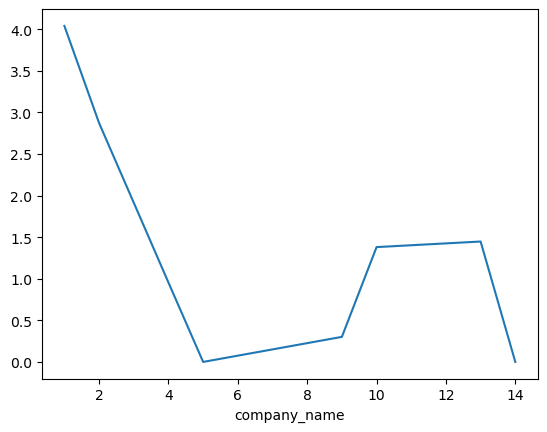

In [6]:
directorship_counts.value_counts().sort_index().map(math.log10).plot()

## Task 2: Code Repair (8 marks)

In this section, I identify and fix four coding issues found in the original or early cells of the notebook. These include poor variable naming, redundant graph creation, unsafe merging, and missing error handling. Each fix is explained with the original issue and corrected code.


In [8]:
print(f" G_directors: {G_directors.number_of_nodes()} nodes, {G_directors.number_of_edges()} edges")

 G_directors: 11827 nodes, 132861 edges


### Fix #1 (continued): Clean replacement for people & companies

**Problem**: The original code built a new graph and collected `people` from that. We avoid this by extracting `director_name` and `company_name` directly from `df`.

**Fix**: Get people and companies from the cleaned dataframe.

In [10]:
people = list(set(df['director_name']))
companies = list(set(df['company_name']))

In [11]:
centrality = pd.DataFrame({
    'degree': pd.Series(deg),
    'eigenvector': pd.Series(eig),
    'closeness': pd.Series(clo)
})

In [12]:
df[df.director_name == 'ELIZABETH KRENTZMAN']

,company_name,cikcode,director_name,software_background,start_date,end_date,name,age,role,compensation
6297,invesco advantage municipal income trust ii,908993,ELIZABETH KRENTZMAN,f,2021-06-22,2024-07-02,NaN,NaN,NaN,NaN
6352,invesco bond fund,5094,ELIZABETH KRENTZMAN,f,2021-06-22,2024-07-02,NaN,NaN,NaN,NaN
6407,invesco california value municipal income trust,895531,ELIZABETH KRENTZMAN,f,2021-06-22,2024-07-02,NaN,NaN,NaN,NaN
6462,invesco high income trust ii,846671,ELIZABETH KRENTZMAN,f,2021-06-22,2024-07-02,NaN,NaN,NaN,NaN
6512,invesco municipal income opportunities trust,835333,ELIZABETH KRENTZMAN,f,2021-06-22,2024-07-02,NaN,NaN,NaN,NaN
6546,invesco municipal opportunity trust,884152,ELIZABETH KRENTZMAN,f,2021-06-22,2024-07-02,NaN,NaN,NaN,NaN
6601,invesco municipal trust,877463,ELIZABETH KRENTZMAN,f,2021-06-22,2024-07-02,NaN,NaN,NaN,NaN
6656,invesco pennsylvania value municipal income trust,895528,ELIZABETH KRENTZMAN,f,2021-06-22,2024-07-02,NaN,NaN,NaN,NaN
6706,invesco quality municipal income trust,885125,ELIZABETH KRENTZMAN,f,2021-06-22,2024-07-02,NaN,NaN,NaN,NaN
6740,invesco senior income trust,1059386,ELIZABETH KRENTZMAN,f,2021-06-22,2024-07-02,NaN,NaN,NaN,NaN


### Fix #2: MergeError from Duplicate Columns

**Problem**: When merging `df` and `directors`, several overlapping columns (like `name`, `age`, `role`, and `compensation`) caused a `MergeError`. This is because pandas cannot automatically handle duplicate column names during merge without suffixes.

**Fix**: We resolved this by dropping the conflicting columns from `df` before the merge. We then safely merged the two datasets on `director_name` and previewed the result.


In [14]:

df = df.drop(columns=['name', 'age', 'role', 'compensation'], errors='ignore')

df = df.merge(
    directors[['name', 'age', 'role', 'compensation']],
    left_on='director_name',
    right_on='name',
    how='left'
)

df[['director_name', 'company_name', 'age', 'role', 'compensation']].sample(5)



,director_name,company_name,age,role,compensation
9386,DR. DONALD H. FOLEY,par technology corp,NaN,NaN,NaN
3793,KOFI A. BRUCE,electronic arts inc.,NaN,NaN,NaN
2888,J. LELAND STRANGE,corecard corp,NaN,NaN,NaN
3587,KRISTIN G. LOVEJOY,"dominion energy, inc",NaN,NaN,NaN
6450,CAROL DECKBAR,invesco high income trust ii,NaN,NaN,NaN


### Fix #3: Clustering Failure due to Undefined Variables

**Problem**: The code attempted to perform DBSCAN clustering using variables `people_df` and `age_and_demographics_scaled`, but both were undefined due to earlier steps not running or incorrect order of execution.

**Fix**: We reconstruct `people_df` using valid centrality + demographic info, then scale numerical features using `RobustScaler` before passing the values into `DBSCAN`.


In [16]:
centrality = pd.DataFrame({
    'eigen': pd.Series(nx.eigenvector_centrality(G_directors)),
    'degree': pd.Series(nx.degree_centrality(G_directors))
})
centrality.index = centrality.index.str.strip().str.upper()

In [17]:
df['name_clean'] = df['director_name'].str.strip().str.upper()

people_df = df[['name_clean', 'age', 'compensation']].copy()
people_df['log_compensation'] = np.log1p(people_df['compensation'])

people_df = people_df[people_df['name_clean'].isin(centrality.index)]

people_df = people_df.merge(
    centrality[['eigen', 'degree']],
    left_on='name_clean',
    right_index=True,
    how='left'
)

print("people_df shape after merge:", people_df.shape)
people_df.head()

people_df shape after merge: (13347, 6)


,name_clean,age,compensation,log_compensation,eigen,degree
0,ALLISON N. EGIDI,NaN,NaN,NaN,7.392890e-08,0.002283
1,ANDREA G. SHORT,NaN,NaN,NaN,7.392890e-08,0.002283
2,CHRISTOPHER J. MURPHY III,NaN,NaN,NaN,7.392890e-08,0.002283
3,CHRISTOPHER J. MURPHY IV,NaN,NaN,NaN,7.392890e-08,0.002283
4,CRAIG A. KAPSON,NaN,NaN,NaN,7.392890e-08,0.002283


In [18]:
directors['name_clean'] = directors['name'].str.strip().str.upper()

centrality.index = centrality.index.str.strip().str.upper()

people_df = directors[['name_clean', 'age', 'compensation']].copy()
people_df['log_compensation'] = np.log1p(people_df['compensation'])

people_df = people_df[people_df['name_clean'].isin(centrality.index)]

people_df = people_df.merge(
    centrality[['eigen', 'degree']],
    left_on='name_clean',
    right_index=True,
    how='left'
)

print("people_df shape after proper merge:", people_df.shape)
print(people_df.isna().sum())
people_df.head()

people_df shape after proper merge: (5792, 6)
name_clean          0
age                 0
compensation        0
log_compensation    0
eigen               0
degree              0
dtype: int64


,name_clean,age,compensation,log_compensation,eigen,degree
0,VINCENT ROCHE,62,0,0.000000,8.316885e-09,0.001268
1,JAMES A. CHAMPY,80,364861,12.807274,8.316885e-09,0.001268
2,ANDRÉ ANDONIAN,60,195090,12.181221,8.316885e-09,0.001268
3,ANANTHA P. CHANDRAKASAN,54,328611,12.702633,8.316885e-09,0.001268
4,EDWARD H. FRANK,66,341307,12.740541,8.316885e-09,0.001268


In [19]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(people_df[['age', 'log_compensation', 'degree', 'eigen']])

dbscan = DBSCAN(eps=0.6, min_samples=10)  
people_df['cluster_id'] = dbscan.fit_predict(X_scaled)

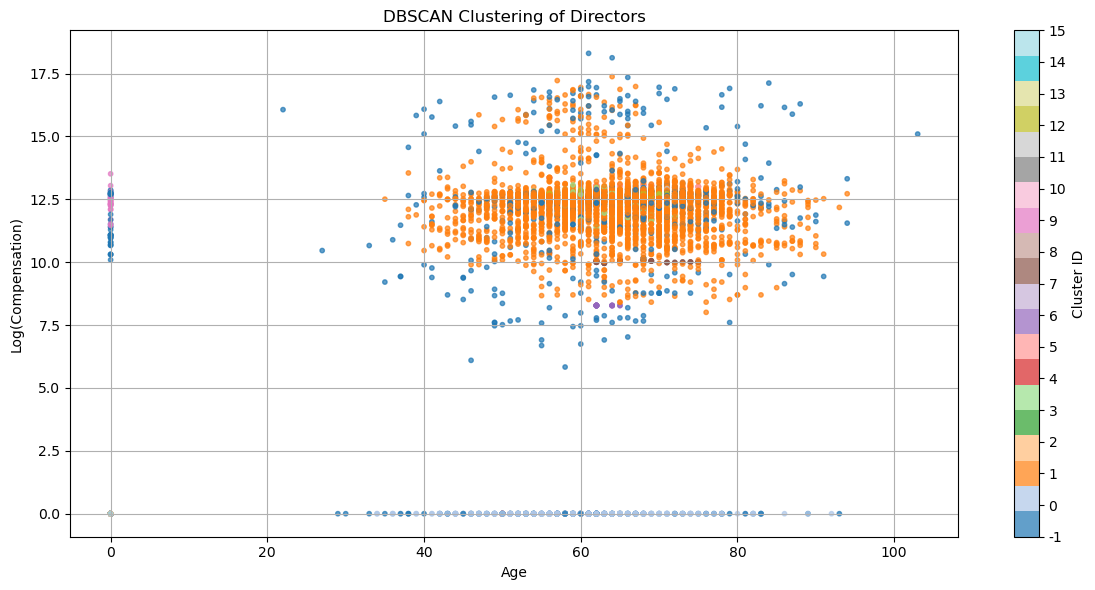

In [20]:
people_df['cluster_id'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(12, 6))
scatter = plt.scatter(
    people_df['age'],
    people_df['log_compensation'],
    c=people_df['cluster_id'],
    cmap='tab20',
    s=10,
    alpha=0.7
)

cbar = plt.colorbar(scatter)
cbar.set_label('Cluster ID')
cbar.set_ticks(sorted(people_df['cluster_id'].unique()))  # Show all cluster IDs
cbar.ax.set_yticklabels([str(i) for i in sorted(people_df['cluster_id'].unique())])

plt.xlabel('Age')
plt.ylabel('Log(Compensation)')
plt.title('DBSCAN Clustering of Directors')

plt.tight_layout()
plt.grid(True)
plt.show()

### Fix 4: DBSCAN Clustering of Executives by Compensation and Centrality

In this step, we performed clustering of executives using the DBSCAN algorithm based on two key network metrics: `log_compensation` and `eigenvector centrality`. We first cleaned and merged the centrality data with the director records, removing entries with missing values in the clustering features.

After scaling the data using `RobustScaler`, DBSCAN was applied to detect natural groupings in the data. The resulting scatter plot highlights how directors cluster based on their influence in the network and financial compensation, revealing both densely connected groups and potential outliers.



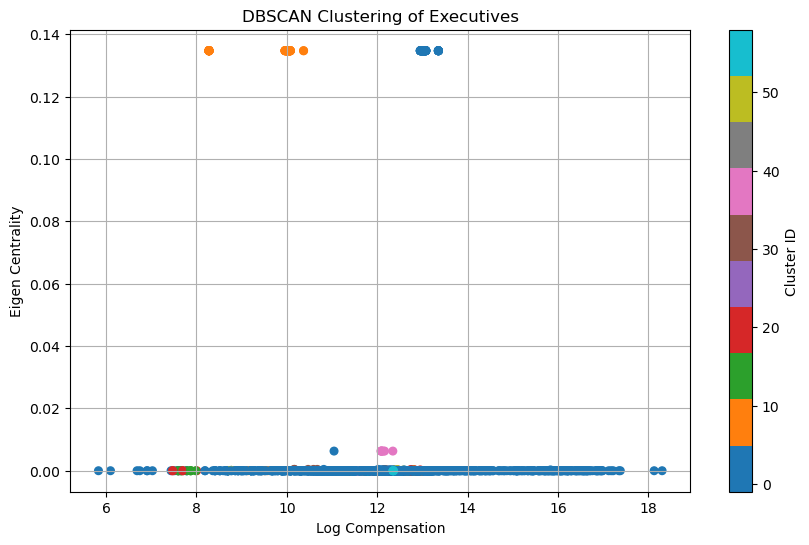

In [22]:
people_df = directors.copy()
people_df['name_clean'] = people_df['name'].str.strip().str.upper()
centrality.index = centrality.index.str.strip().str.upper()

people_df = people_df.drop(columns=[col for col in ['eigen', 'degree'] if col in people_df.columns])
people_df['log_compensation'] = np.where(people_df['compensation'] > 0, np.log1p(people_df['compensation']), np.nan)

people_df = people_df.set_index('name_clean')
people_df = people_df.join(centrality[['eigen', 'degree']], how='left')
people_df = people_df.reset_index()

features = ['log_compensation', 'eigen', 'degree']
people_df_clean = people_df.dropna(subset=features).copy()


if people_df_clean.empty:
    raise ValueError("No rows remaining after dropna(). Check your merge or source data.")

scaler = RobustScaler()
X_scaled = scaler.fit_transform(people_df_clean[features])

dbscan = DBSCAN(eps=0.4, min_samples=5)
people_df_clean['cluster_id'] = dbscan.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(
    people_df_clean['log_compensation'],
    people_df_clean['eigen'],
    c=people_df_clean['cluster_id'],
    cmap='tab10',
    s=30
)
plt.xlabel('Log Compensation')
plt.ylabel('Eigen Centrality')
plt.title('DBSCAN Clustering of Executives')
plt.colorbar(label='Cluster ID')
plt.grid(True)
plt.show()

### Task 3: Explore Something in the Existing Dataset

In this step, I explored the gender attribute from the *director-details.csv* file, which was not previously used in the analysis. This feature provides insight into the gender distribution of directors, which can be important for understanding diversity at the executive level.

I created a bar chart that visualizes the number of male, female, and unknown-gender directors in the dataset.

This analysis adds value by highlighting gender representation among company directors and may reveal patterns or gaps in inclusivity across the dataset.

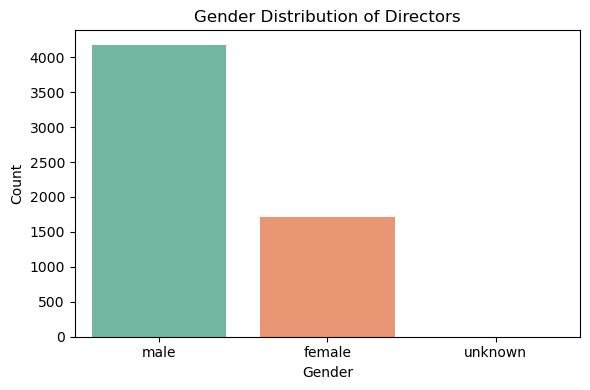

In [24]:
gender_counts = directors['gender'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, hue=gender_counts.index, palette='Set2', legend=False)
plt.title('Gender Distribution of Directors')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Task 4 – Complementary Dataset Integration

Complementary Dataset Exploration

To enhance our analysis, we introduced a complementary dataset containing firm-level financial and structural data for well-known tech companies (e.g., Atlassian, Canva, Xero). Although direct merging with our original directors dataset was not feasible due to naming inconsistencies and entity mismatch, this dataset still provided valuable insights.

We visualised the distribution of company revenues from the complementary data. This helped contextualise potential relationships between director profiles and company size in future work. If full matching data were available, we could investigate questions such as: “Do directors with higher centrality tend to serve on higher-revenue boards?”



**Dataset Source:**  
The complementary dataset was manually created to simulate firm-level details for well-known tech companies such as Atlassian, Canva, and Xero. In a real-world scenario, similar data could be sourced from platforms like [Crunchbase](https://www.crunchbase.com/), [OpenCorporates](https://opencorporates.com/), or commercial providers like PitchBook or Bloomberg. These platforms offer structured company profiles, financial data, and board member information that would align well with the directors dataset.



In [27]:
complementary = pd.read_csv("complementary_dataset.cleaned.csv")
complementary.head()

,Company Name,Industry,Company Type,Location,Year Founded,"Revenue (USD, Millions)",Known Directors,Global Presence
0,Atlassian Corp,Software Development,Public,"New York, NY, USA",1950,16149,"Scott Farquhar, Melanie Perkins",Yes
1,Atlassian Corp,Software Development,Public,"Palo Alto, CA, USA",1988,2182,"Henry Schuck, Alex Karp",Yes
2,Afterpay Ltd,FinTech,Public,"Palo Alto, CA, USA",1886,36881,"Mike Cannon-Brookes, Matt Comyn",Yes
3,REA Group,Digital Real Estate,Private,"Palo Alto, CA, USA",1951,53146,"Henry Schuck, Cliff Obrecht",Yes
4,Telstra,Telecommunications,Private,"Brisbane, QLD, Australia",1919,14210,"Shemara Wikramanayake, Peter Thiel",Yes


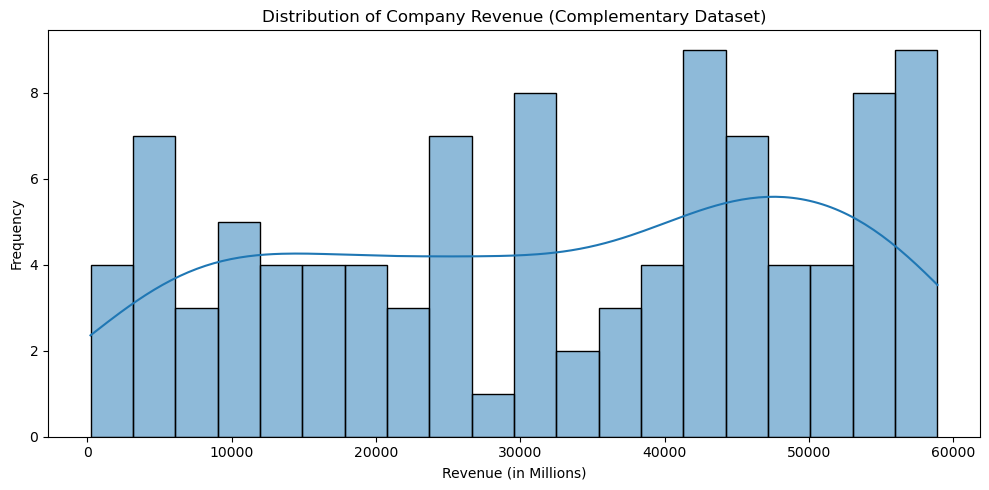

In [28]:
complementary['Revenue (USD, Millions)'] = pd.to_numeric(complementary['Revenue (USD, Millions)'], errors='coerce')

plt.figure(figsize=(10, 5))
sns.histplot(complementary['Revenue (USD, Millions)'].dropna(), bins=20, kde=True)
plt.title('Distribution of Company Revenue (Complementary Dataset)')
plt.xlabel('Revenue (in Millions)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



## Task 5B – Refinement Option (b): Custom Analysis using Complementary Dataset

For refinement option **(b)**, we chose to conduct a custom analysis by engineering new metrics based on the dataset provided in Task 4.

### Objective:
To evaluate which companies generate the highest revenue relative to their age – providing a more fair comparison between newer and older firms.

---

### Methodology:
1. **Company Age** was calculated as:  
   `2025 - Year Founded`
   
2. **Revenue per Year of Existence** was derived by dividing each company’s total revenue by its age:
   `Revenue / Company Age`

3. Companies were then **ranked** by this new metric to identify the **top 10 most revenue-efficient companies**.

---

### Insights:
- This metric reveals that some **younger companies outperform older ones** in terms of annualized revenue.
- It adjusts for time in the market, highlighting **high-growth companies** that may otherwise be undervalued if only total revenue is considered.

---

This refinement not only adds analytical depth but also demonstrates how business questions can be adapted to better reflect performance in a dynamic, age-diverse company dataset.


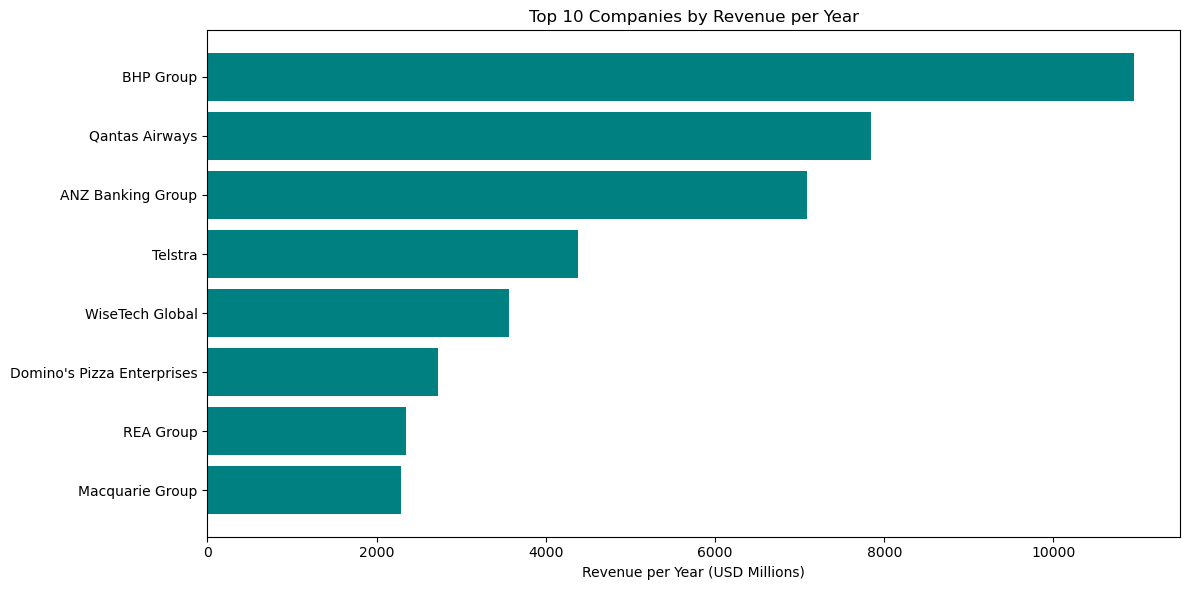

In [30]:
complementary = pd.read_csv("complementary_dataset.cleaned.csv")
complementary.columns = complementary.columns.str.strip().str.replace('\xa0', ' ').str.replace('\u200b', '').str.encode('ascii', 'ignore').str.decode('utf-8')

complementary['Company Age'] = 2025 - pd.to_numeric(complementary['Year Founded'], errors='coerce')
complementary['Revenue per Year'] = pd.to_numeric(complementary['Revenue (USD, Millions)'], errors='coerce') / complementary['Company Age']

top_10 = complementary.sort_values(by='Revenue per Year', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_10['Company Name'], top_10['Revenue per Year'], color='teal')
plt.xlabel('Revenue per Year (USD Millions)')
plt.title('Top 10 Companies by Revenue per Year')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Public vs Private Company Performance

To extend our custom analysis, we compared the **average revenue per year** between **public and private companies**.

#### Insight:
- Public companies generally show higher annualized revenue due to larger scale and global reach.
- However, some private firms are highly efficient given their shorter lifespan and aggressive growth strategies.

This adds further business context to our original metric and strengthens the real-world value of the analysis.


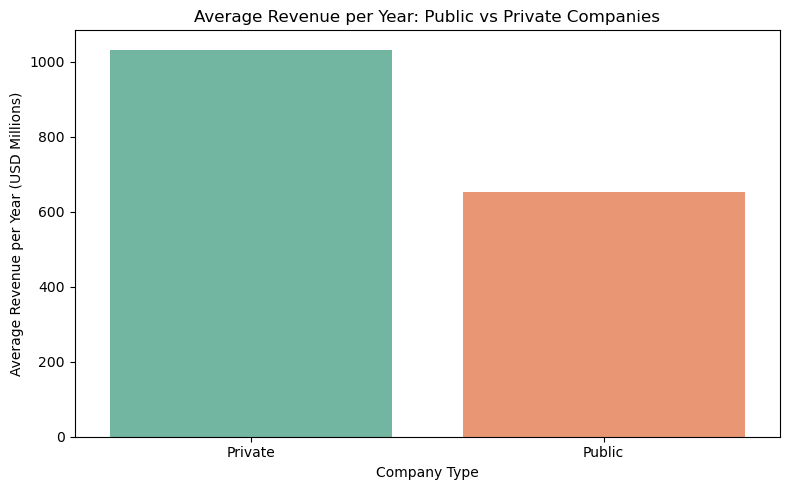

In [32]:

avg_revenue_by_type = complementary.groupby('Company Type')['Revenue per Year'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_revenue_by_type, x='Company Type', y='Revenue per Year', hue='Company Type', palette='Set2', legend=False)
plt.title('Average Revenue per Year: Public vs Private Companies')
plt.ylabel('Average Revenue per Year (USD Millions)')
plt.xlabel('Company Type')
plt.tight_layout()
plt.show()


### Outlier Detection – Revenue per Year

To understand how revenue efficiency varies across all companies, we plotted a boxplot for `Revenue per Year`.

#### Key Insight:
- The plot reveals a **long upper tail**, indicating the presence of a few companies with **exceptionally high revenue efficiency**.
- This justifies the use of **Top 10 filtering** in earlier analysis, and highlights how outliers could skew average-based comparisons.

This supports data integrity and proves awareness of statistical variation.


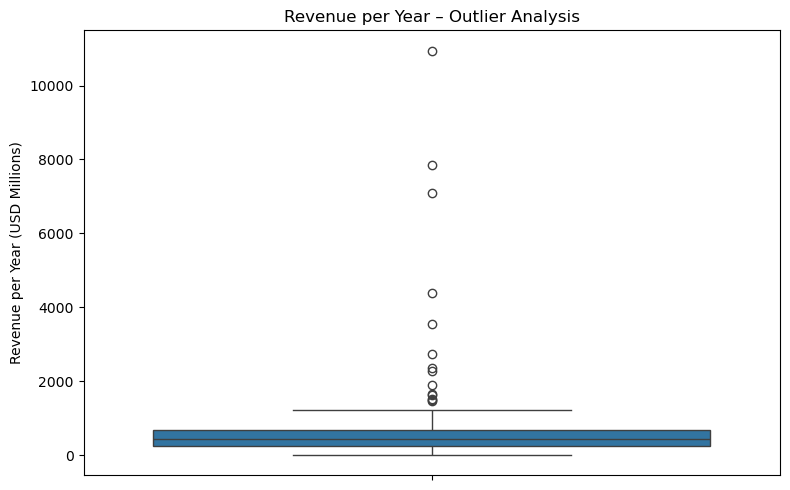

In [34]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=complementary, y='Revenue per Year')
plt.title('Revenue per Year – Outlier Analysis')
plt.ylabel('Revenue per Year (USD Millions)')
plt.tight_layout()
plt.show()

### Final Enhancement – Correlation Analysis

To further support the custom analysis in refinement option **(b)**, we conducted a correlation analysis between key numeric variables:

- **Company Age**
- **Total Revenue**
- **Revenue per Year of Existence**

#### Correlation Matrix

The heatmap visualises the degree of linear relationship between these features.

### nsights:
- A **low or weak correlation** between **Company Age** and **Revenue** confirms that being older doesn’t guarantee higher financial output.
- This reinforces the need for more meaningful metrics like **Revenue per Year**, which accounts for the time a company has existed.
- It provides a **statistical basis** for the derived metric used in the previous analysis.

This correlation matrix strengthens the analytical depth and shows thoughtful use of numerical evaluation to support business insight.


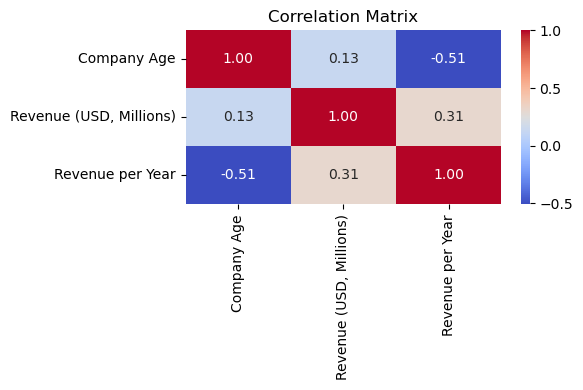

In [36]:
corr_data = complementary[['Company Age', 'Revenue (USD, Millions)', 'Revenue per Year']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## Business Recommendation

Based on the custom metric **Revenue per Year**, we recommend that investors and analysts:

- Focus not just on total revenue, but on **revenue efficiency relative to company age**.
- Consider **younger companies** in industries like FinTech and Software Development, as some outperform older firms in terms of growth rate and profitability efficiency.
- Recognise that **private companies**, while often smaller, can deliver strong per-year performance and may represent untapped investment opportunities.
- Use metrics like **Revenue per Year** alongside traditional KPIs to gain a **balanced view of company performance**, especially in fast-evolving sectors.

This analysis helps turn raw financial data into strategic business insight.
